# 1. Importing Modules

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# 2. Loading Data

In [2]:
fashion_data=tf.keras.datasets.fashion_mnist

In [3]:
fashion_data

<module 'tensorflow.keras.datasets.fashion_mnist' from 'c:\\users\\hp\\appdata\\local\\programs\\python\\python37\\lib\\site-packages\\tensorflow\\keras\\datasets\\fashion_mnist\\__init__.py'>

# 3. Testing and Training Data

In [4]:
(inp_train,out_train),(inp_test,out_test)=fashion_data.load_data()
inp_train = inp_train/255.0
inp_test = inp_test/255.0

In [5]:
print("Shape of Input Training Data: ", inp_train.shape)
print("Shape of Output Training Data: ", out_train.shape)
print("Shape of Input Testing Data: ", inp_test.shape)
print("Shape of Output Testing Data: ", out_test.shape)

Shape of Input Training Data:  (60000, 28, 28)
Shape of Output Training Data:  (60000,)
Shape of Input Testing Data:  (10000, 28, 28)
Shape of Output Testing Data:  (10000,)


# 4. Data Visualization

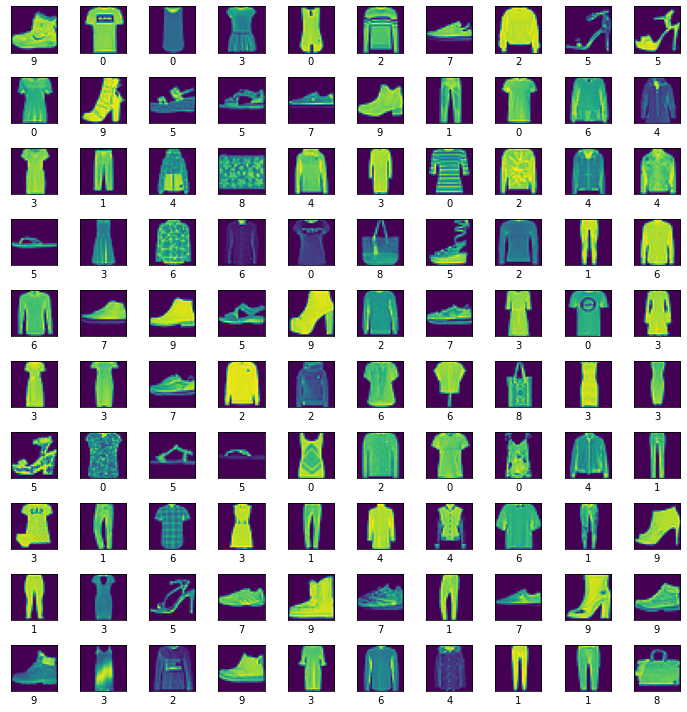

In [6]:
plt.figure(figsize=(10,10))
for i in range(100):
    plt.subplot(10,10,i+1)
    plt.imshow(inp_train[i])
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(out_train[i])
    plt.tight_layout()
plt.show()

#  5. Giving names to labels

In [7]:
Labels=['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

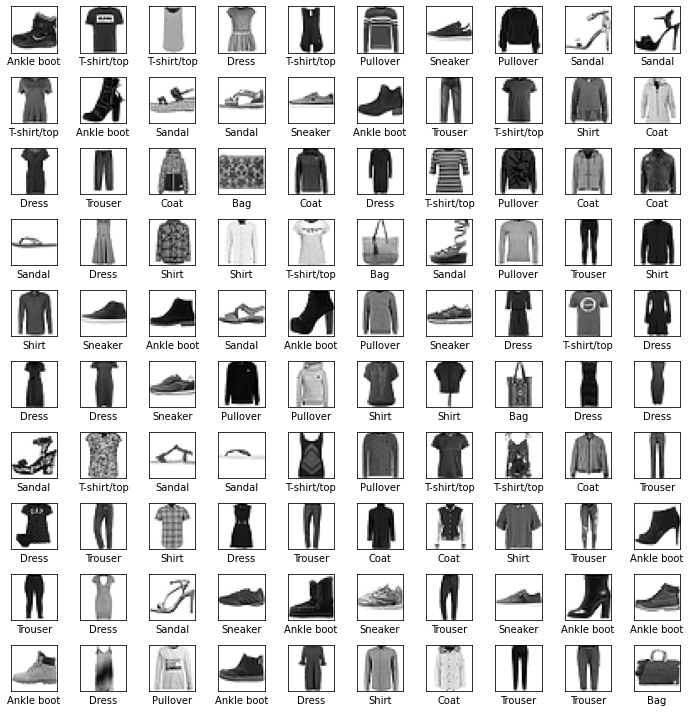

In [8]:
plt.figure(figsize=(10,10))
for i in range(100):
    plt.subplot(10,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(inp_train[i], cmap=plt.cm.binary)
    plt.xlabel(Labels[out_train[i]])
    plt.tight_layout()
plt.show()

# 6. Building the Model

In [9]:
my_model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

# 7. Compiling the Model

In [10]:
my_model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# 8. Training the Model

In [11]:
my_model.fit(inp_train, out_train, epochs=20)

Epoch 1/20
1875/1875 [==============================] - 2s 998us/step - loss: 0.6246 - accuracy: 0.7832
Epoch 2/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3835 - accuracy: 0.8612
Epoch 3/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3323 - accuracy: 0.8773
Epoch 4/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3123 - accuracy: 0.8850
Epoch 5/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2943 - accuracy: 0.8907
Epoch 6/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2745 - accuracy: 0.8966
Epoch 7/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2643 - accuracy: 0.9020
Epoch 8/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2550 - accuracy: 0.9066
Epoch 9/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2477 - accuracy: 0.9076
Epoch 10/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2

# 9. Checking Accuracy and Loss

In [12]:
loss, accuracy = my_model.evaluate(inp_test,out_test,verbose=2)
print('\nAccuracy:',accuracy*100)

313/313 - 0s - loss: 0.3577 - accuracy: 0.8882

Accuracy: 88.81999850273132


# 10. Making Predictions

In [13]:
prob=tf.keras.Sequential([my_model,tf.keras.layers.Softmax()])

In [14]:
pred=prob.predict(inp_test)

# 11. Final Visualization

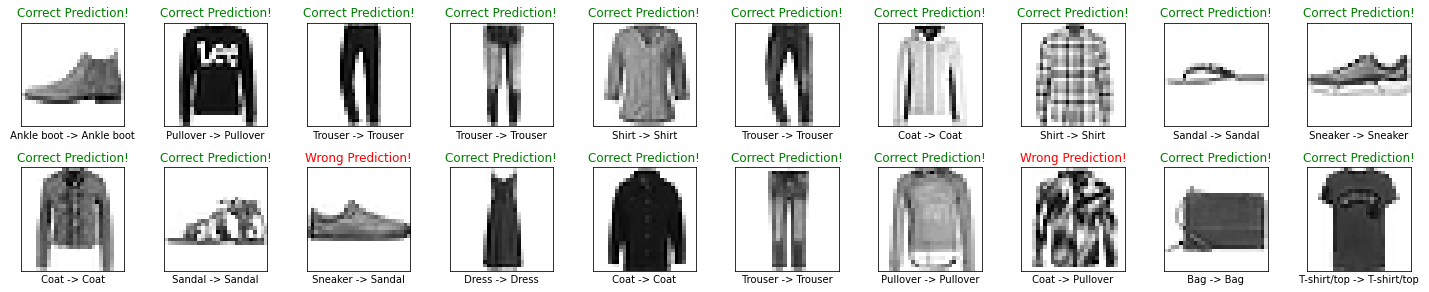

In [15]:
plt.figure(figsize=(20,20))
for i in range(20):
    true_label,image = out_test[i],inp_test[i]
    pred_label = np.argmax(pred[i])
    plt.subplot(10,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(image, cmap=plt.cm.binary)
    if pred_label == true_label:
        color = 'green'
        label="Correct Prediction!"
    else:
        color = 'red'
        label="Wrong Prediction!"
    plt.tight_layout()
    plt.title(label,color=color)
    plt.xlabel(" {} -> {} ".format(Labels[true_label],Labels[pred_label]))